In [6]:
import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
weight = 0.7
bias = 0.3

## creating data

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X  + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
train_split = int(0.8 * len(X))
X_train, y_train, X_test, y_test = X[:train_split], y[:train_split], X[train_split:], y[train_split:]
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [9]:
def plot_predictions(train_data=X_train,
                     train_lables=y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    '''
    Plots training data, test data and compares predicitons
    '''

    plt.figure(figsize=(15,10))
    plt.scatter(train_data,train_lables,s=5,c='b',label='Training data')

    plt.scatter(test_data,test_labels,s=10,c='g',label='Test Data')

    if predictions is not None:
        plt.scatter(test_data,predictions,s=5,c='r',label='Predictions')

    plt.legend(prop={'size':14})
    plt.show

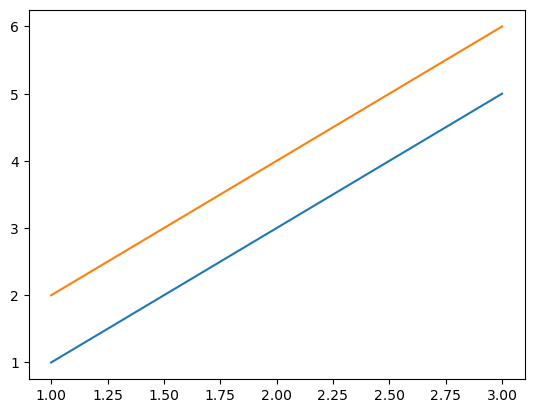

In [10]:
x = [1, 2, 3]
y = np.array([[1, 2], [3, 4], [5, 6]])
plt.plot(x, y)

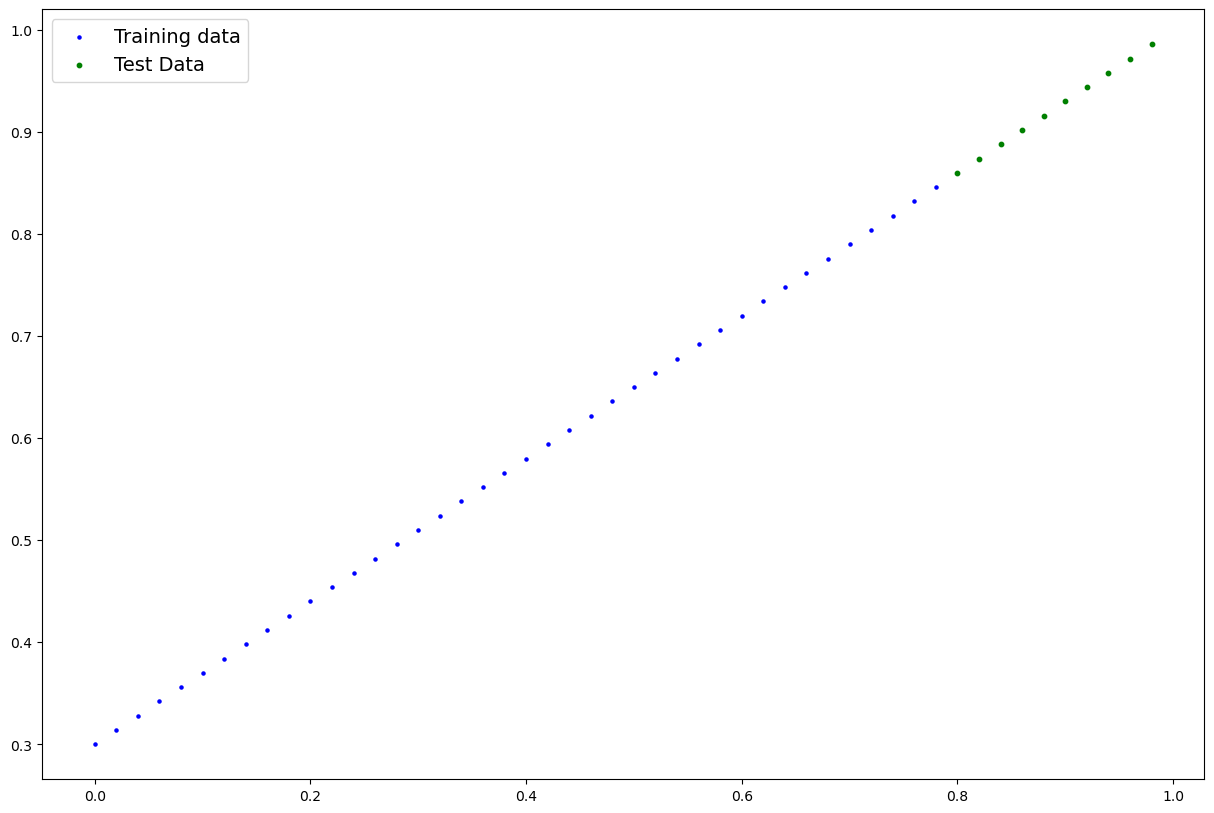

In [11]:
plot_predictions()

In [12]:
## Create a linear regression model class

In [13]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # this is the linear regression formula
    # Gradient descent Algorithm is used


In [14]:
l = LinearRegressionModel()
l.weights,l.bias

(Parameter containing:
 tensor([-0.8807], requires_grad=True),
 Parameter containing:
 tensor([1.0734], requires_grad=True))

In [15]:
## Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()
print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [16]:
## List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
weight, bias

(0.7, 0.3)

In [18]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [19]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

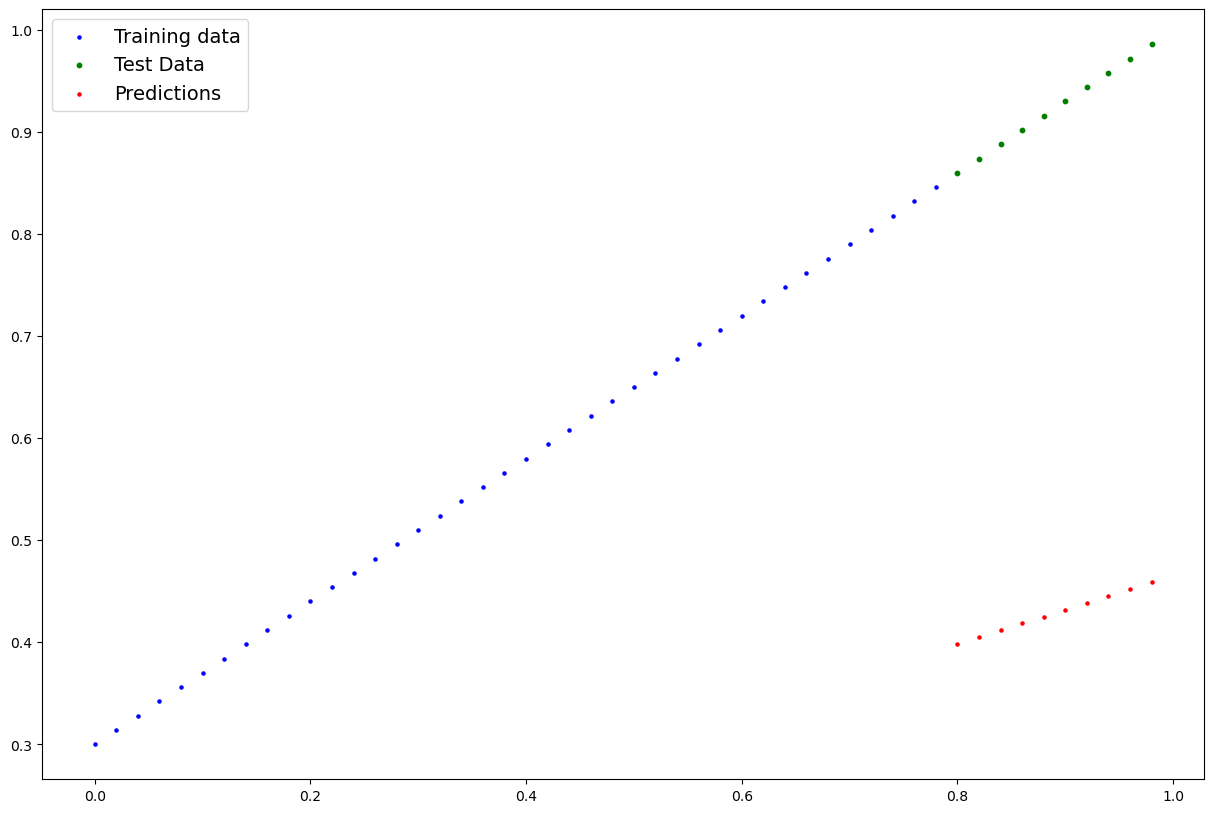

In [20]:
plot_predictions(predictions=y_preds)

In [21]:
with torch.no_grad():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [22]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [23]:
## Setup a loss functions

loss_fn = nn.L1Loss()

## Setup an optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) ## lr = learning rate

In [24]:
## Building a training loop and testing loop in pytorch

In [25]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
epochs = 100


## Training

## 0. Loop through the data
for epoch in range(epochs):
    model_0.train() ## train mode in pytorch set
    
    ## 1. Forward pass
    y_pred = model_0(X_train)
    
    ## 2. Calculate the loss
    loss = loss_fn(y_pred,y_train)
    print(f'Loss: {loss}')
    ## 3. Optimizer zero grad
    optimizer.zero_grad()
    
    ## 4. Perform back propagation on the loss with respect to the parameters of the model
    loss.backward()
    
    ## 5. Step the optimizer (perform gradient descent )
    optimizer.step()
    ## 
    
    model_0.eval()
    print(f'MODEL Params: {model_0.state_dict()}')

Loss: 0.31288138031959534
MODEL Params: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
MODEL Params: OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
MODEL Params: OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
MODEL Params: OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
MODEL Params: OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
MODEL Params: OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
MODEL Params: OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
MODEL Params: OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
MODEL Params: OrderedDict([('weights', tensor([0.3718])), ('bias', tensor

In [27]:
print(model_0.eval())

LinearRegressionModel()


In [28]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

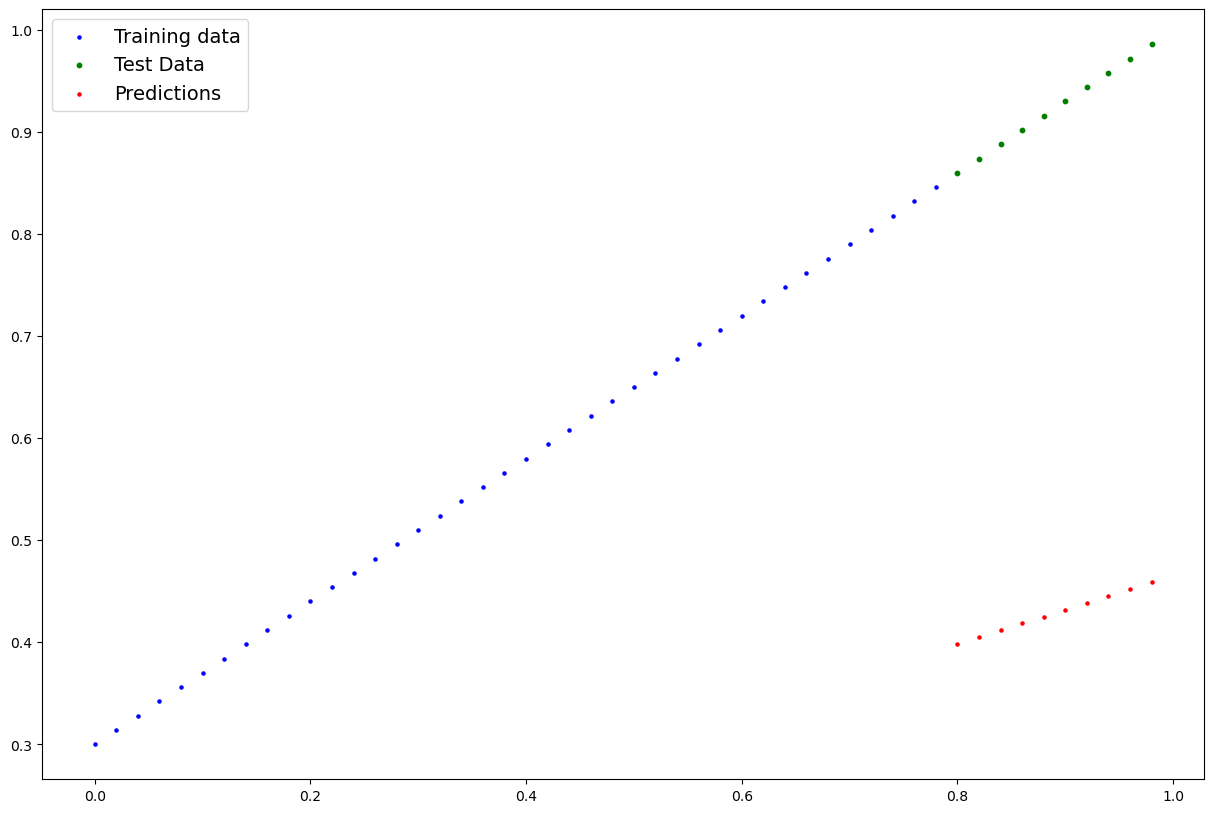

In [29]:
plot_predictions(predictions=y_preds.detach().numpy())

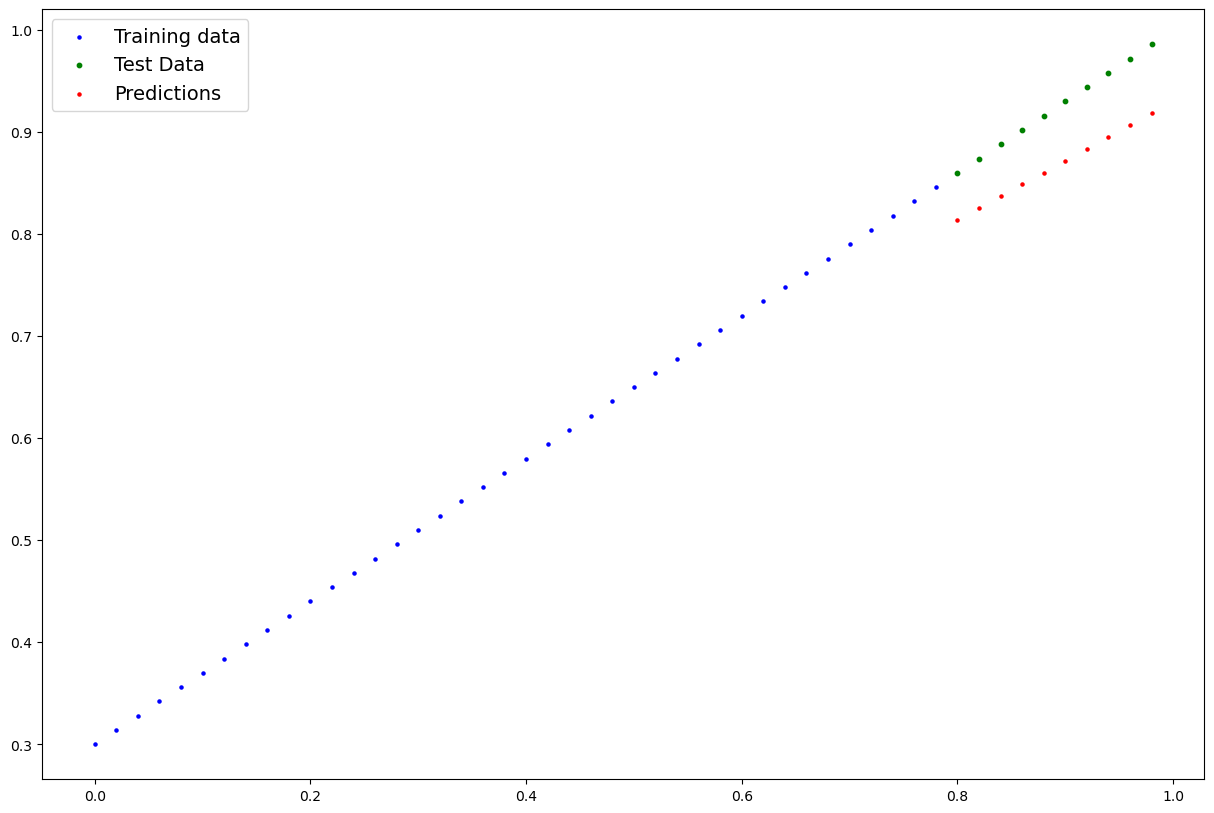

In [30]:
plot_predictions(predictions=y_preds_new)

In [31]:
## Testing

In [60]:
## Create a random seed
torch.manual_seed(42)

model_1 = LinearRegressionModel()

In [61]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [62]:
## Setup a loss functions

loss_fn = nn.L1Loss()

## Setup an optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01) ## lr = learning rate

In [63]:
torch.manual_seed(42)

epochs = 200


## Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []



## Training
## 0. Loop through the data
for epoch in range(epochs):
    model_1.train() ## train mode in pytorch set
    
    ## 1. Forward pass
    y_pred = model_1(X_train)
    
    ## 2. Calculate the loss
    loss = loss_fn(y_pred,y_train)
    print(f'Loss: {loss}')
    ## 3. Optimizer zero grad
    optimizer.zero_grad()
    
    ## 4. Perform back propagation on the loss with respect to the parameters of the model
    loss.backward()
    
    ## 5. Step the optimizer (perform gradient descent )
    optimizer.step()
    ## 
    
    model_1.eval() ## turns off different settings in the model not needed for evaluation/ testing
    
    with torch.inference_mode(): ## turns off gradient trackiong and a couple more things behind the scenes
        ## 1. Do the forward pass 
        test_pred = model_1(X_test)
        
        ## 2. Calculate the loss
        test_loss = loss_fn(test_pred,y_test)
    

    
    if epoch%10 == 0:
        print(f'Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}')
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
    
        print(f'MODEL Params: {model_1.state_dict()}')

Loss: 0.31288138031959534
Epoch: 0 | Test: 0.31288138031959534 | Test Loss: 0.48106518387794495
MODEL Params: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Test: 0.1976713240146637 | Test Loss: 0.3463551998138428
MODEL Params: OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Test: 0.08908725529909134 | Test Loss: 0.21729660034179688
MODEL Params: OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3

In [64]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

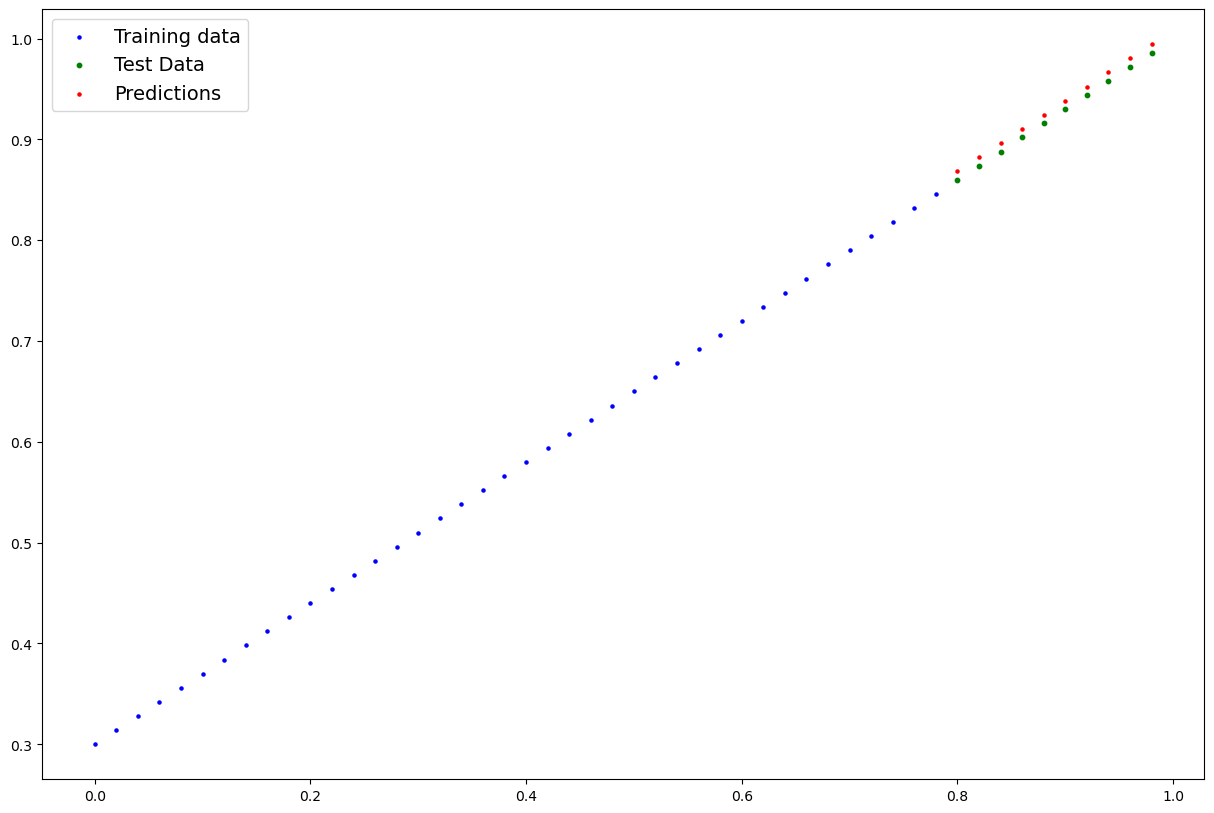

In [65]:
with torch.inference_mode():
    y_preds_new = model_1(X_test)
plot_predictions(predictions=y_preds_new)

In [66]:
epoch_count

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190]

In [67]:
train_loss_values = np.array(torch.tensor(train_loss_values).numpy())
train_loss_values

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

In [68]:
test_loss_values = np.array(torch.tensor(test_loss_values).numpy())
test_loss_values

array([0.48106518, 0.3463552 , 0.2172966 , 0.14464018, 0.11360953,
       0.09919948, 0.08886633, 0.08059376, 0.07232123, 0.06473556,
       0.05646304, 0.0481905 , 0.04060482, 0.03233228, 0.02405975,
       0.01647409, 0.00820156, 0.00502309, 0.00502309, 0.00502309],
      dtype=float32)

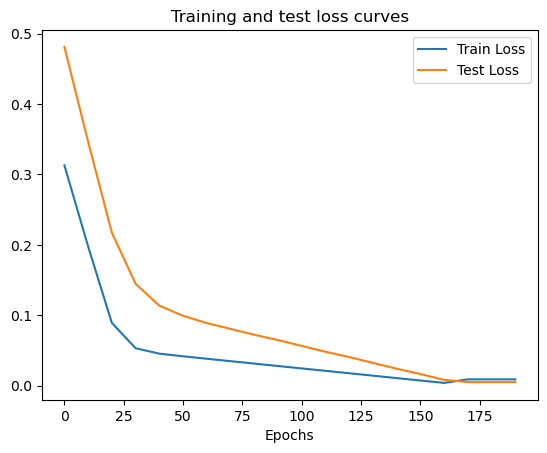

In [69]:
## Plot the loss curves
plt.plot(epoch_count,train_loss_values,label='Train Loss')
plt.plot(epoch_count,test_loss_values,label='Test Loss')
plt.title('Training and test loss curves')
plt.xlabel('Loss')
plt.xlabel('Epochs')
plt.legend()

## Saving a model

1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict()

In [72]:
## Saving pytorch model
from pathlib import Path

# 1. Create a model dir
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Model save path
MODEL_NAME = 'LinearRegressionEarly.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model save dict
print(f'SAVING MODEL {MODEL_NAME} to {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

SAVING MODEL LinearRegressionEarly.pth to models\LinearRegressionEarly.pth


In [78]:
## Loading a PyTorch model

## To load in a saved state_dict we have to instantiate a new instance of out model class

loaded_model = LinearRegressionModel()

## Load the saved state_dict of model_1 (this will update the new instance with updated parameters) 
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [79]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [80]:
## Make some predictions with our loaded model

loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [82]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all back together

In [84]:
## importing libraries
import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

torch.__version__

'2.1.0+cpu'

In [85]:
## Create device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


## 1. Data

In [ ]:
## Create some data using the linear regression form